# <center>Exam2</center>

**1. (30 points)**

**(a)** Find the matrix $P$ that projects every vector $b$ in $R^3$ onto the line in the direction of<br>
$a = (2, 1, 3)$.

$P = a a^T / (a^T a)^{-1}$

In [1]:
import sympy as sp

a = sp.Matrix([
    [2],
    [1],
    [3]
])

P = a * a.T / (a.T * a).inv()[0]
P

Matrix([
[56, 28,  84],
[28, 14,  42],
[84, 42, 126]])

**(b)** What are the column space and nullspace of $P$ ? Describe them geometrically and also
give a basis for each space.

The *column space* of $P$, $C(P)$, is the line through vector $a$, which is:
$$ca = \begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix}$$

The *nullspace* of $P$, $N(P)$:

In [2]:
P.rref()[0]

Matrix([
[1, 1/2, 3/2],
[0,   0,   0],
[0,   0,   0]])

$N(P) = c1 + \begin{bmatrix} -0.5 \\ 1 \\ 0 \end{bmatrix} + c2 \begin{bmatrix} -1.5 \\ 0 \\ 1 \end{bmatrix}$

These spaces of matrix $P$ are *orthogonal* to each other:

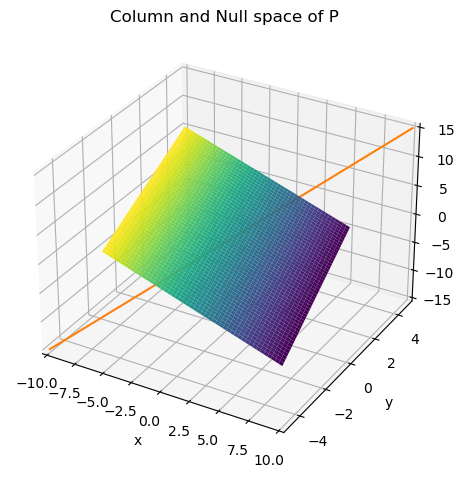

In [3]:
import sympy as sp
from sympy.plotting import plot3d_parametric_surface, plot3d_parametric_line

c, c1, c2 = sp.symbols('c c1 c2')

x_line = c * a[0]
y_line = c * a[1]
z_line = c * a[2]

columnspace_plot = plot3d_parametric_line(x_line, y_line, z_line, (c, -5, 5), show=False)

n1 = sp.Matrix([
    [-0.5],
    [1],
    [0]
])

n2 = sp.Matrix([
    [-1.5],
    [0],
    [1]
])

x_plane = c1 * n1[0] + c2 * n2[0]
y_plane = c1 * n1[1] + c2 * n2[1]
z_plane = c1 * n1[2] + c2 * n2[2]


nullspacce_plot = plot3d_parametric_surface(x_plane, y_plane, z_plane, (c1, -5, 5), (c2, -5, 5), show=False, title='Column and Null space of P')
nullspacce_plot.extend(columnspace_plot)

nullspacce_plot.show()

**(c)** What are all the *eigenvectors* of $P$ and their corresponding *eigenvalues*? (You can use
the geometry of projections, not a messy calculation.) The diagonal entries of $P$ add up
to ____.

Well, since the matrix $P$ is singular, meaning $0$ is an eigenvalue ($Px = 0x$). In fact, there will be another repeated eigenvalue of $0$ since the $N(P)$ in $R^2$. The diagonal entries of $P$ add up to the **third eignvalue**, which is $1$, since $Pa = a$ (if we project on $a$, we get the same $a$):

$\lambda_1 = 0, x_1 = \begin{bmatrix} -0.5 \\ 1 \\ 0 \end{bmatrix} \quad \lambda_2 = 0, x_2 = \begin{bmatrix} -1.5 \\ 0 \\ 1 \end{bmatrix} \quad \lambda_3 = 1, x_3 = a = \begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix}$

In [4]:
P.rref()[0].eigenvects()

[(0,
  2,
  [Matrix([
   [-1/2],
   [   1],
   [   0]]),
   Matrix([
   [-3/2],
   [   0],
   [   1]])]),
 (1,
  1,
  [Matrix([
   [1],
   [0],
   [0]])])]

**2. (30 points)**

**(a)** $p = A \hat x$ is the vector in **C(A)** nearest to a given vector $b$. If $A$ has independent columns,
what equation determines $\hat x$ ? What are all the vectors perpendicular to the error
$e = b − A\hat x$ ? What goes wrong if the columns of $A$ are dependent?

We can use the *norm equations* to find $\hat x$:

$\hat x = (A^TA)^{-1}A^Tb$

The vectors that are prependicular to the error vector $e$ are those in the $C(A)$

If the columns space of $A$, $C(A)$, are debendent then the **determinant** of $A$ is **zero**, $|A| = 0$, which means the matrix $A$ is a ***non invertible*** matrix (*singular* matrix), hence, $(A^TA)^{-1}$ is not defined and we can not find the $\hat x$ vector.

**(b)** Suppose $A = QR$ where $Q$ has orthonormal columns and $R$ is upper triangular invertible.
Find $\hat x$ and $p$ in terms of $Q$ and $R$ and $b$ (not $A$).

$\hat x = (A^TA)^{-1}A^Tb$

$\hat x = ((QR)^T QR)^{-1} (QR)^T b$

$\hat x = (R^TQ^T QR)^{-1} (QR)^T b = (R^TIR)^{-1} (QR)^T b, (Q^T = Q^{-1})$

$\hat x = (R^TR)^{-1} R^TQ^T b$

$\hat x = R^{-1}R^{T^{-1}} R^TQ^T b, (R^{T^{-1}} R^T = I)$

$\boxed{\hat x = R^{-1}Q^T b}$

$p = A \hat x = QR \hat x = QR R^{-1}Q^T b, (R R^{-1} = I)$

$\boxed{p = QQ^T b}$

**(c)** (Separate question) If $q_1$ and $q_2$ are any orthonormal vectors in $R^5$, give a formula for the projection $p$ of any
vector $b$ onto the plane spanned by $q_1$ and $q_2$ (write $p$ as a combination of $q_1$ and $q_2$).

$p = (b q_1)q_1 + (b q_2)q_2$

**3. (40 points)** This problem is about the $n$ by $n$ matrix $A_n$ that has zeros on its main
diagonal and all other entries equal to $−1$. In MATLAB $A_n = eye(n) − ones(n)$.

**(a)** Find the determinant of $A_n$. Here is a suggested approach:
    
Start by adding all rows (except the last) to the last row, and then factoring out a
constant. (You could check $n = 3$ to have a start on part **b**.)

Well, after we add all rows to the last row, we get a last row with entries equals to $-n + 1$.

Next, we factor out this number,  making last row entries equals to $1$, so $|A| = (-n + 1) |of new matrix|$.

Adding the last row again to other rows and subtract them from the last row to get the  identity matrix $I$ which has $1$ determinant.

So, $|A| = (-n + 1) |I| = (-n + 1)$.

Taking an example of $A_3$:

In [5]:
A = sp.eye(3) - sp.ones(3) # generate matrix A, equivalent command to MATLAB eye(n)-ones(n) command.
A

Matrix([
[ 0, -1, -1],
[-1,  0, -1],
[-1, -1,  0]])

Adding all rows to last row:

In [6]:
A[2, :] = A[2, :] + A[1, :] + A[0, :] 
A

Matrix([
[ 0, -1, -1],
[-1,  0, -1],
[-2, -2, -2]])

Factor out $-2$ from the last row:

In [7]:
last_row_factor = -2
A[2, :] = sp.Matrix([1, 1, 1]).T

A

Matrix([
[ 0, -1, -1],
[-1,  0, -1],
[ 1,  1,  1]])

Adding again all rows to last row:

In [8]:
A[0, :] = A[0, :] + A[2, :]
A[1, :] = A[1, :] + A[2, :]
A

Matrix([
[1, 0, 0],
[0, 1, 0],
[1, 1, 1]])

Subtract all rows from last row to get $I$:

In [9]:
A[2, :] = A[2, :] - A[1, :] - A[0, :] 
A

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

Next, finding the determinant:

In [10]:
last_row_factor * A.det()

-2

**(b)** For any invertible matrix $A$, the (1, 1) entry of $A^{−1}$ is the ratio of ______. <br>
So the (1, 1) entry of $A^{-1}_4$ is ______.

For any invertible matrix $A$, the (1, 1) entry of $A^{−1}$ is the ratio of $\boxed {C_{11}^{T} to |A|}$. Where $C$ is the **Cofactors** matrix.<br>
So the (1, 1) entry of $A^{-1}_4$ is $C_{11}^{T}/-3$.

$C_{11}^{T} = det($of A with first row and first column removed$)$ $= det(A_3)$ $= -2$.

So the (1, 1) entry of $A^{-1}_4$ is $\boxed{-2/-3}$.

In [11]:
A = sp.eye(4) - sp.ones(4)
A.inv()[0, 0]

2/3

**(c)** Find two orthogonal eigenvectors with $A_3 x = x$. (So $\lambda = 1$ is a double eigenvalue.)

In [12]:
A = sp.eye(3) - sp.ones(3)
A

Matrix([
[ 0, -1, -1],
[-1,  0, -1],
[-1, -1,  0]])

In [13]:
(A - sp.eye(3)).rref()[0]

Matrix([
[1, 1, 1],
[0, 0, 0],
[0, 0, 0]])

$\lambda_1 = 1 \quad x_1 = \begin{bmatrix} -1 \\ 1 \\ 0 \end{bmatrix}$, $\quad \lambda_2 = 1 \quad x_2 = \begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix}$

but those are **not** orthogonal vectors:

In [14]:
x1 = sp.Matrix([
    [-1],
    [1],
    [0]
])

x2 = sp.Matrix([
    [-1],
    [0],
    [1]
])

x1.T * x2

Matrix([[1]])

Using **Graham-Schmidt** to get an orthogonal vector to $x_1$ from $x_2$:

In [15]:
x2 = x2 - x1 * (x1.T * x1).inv() * x1.T * x2
x2

Matrix([
[-1/2],
[-1/2],
[   1]])

One last check:

In [16]:
x2.T * x1

Matrix([[0]])

**(d)** What is the third eigenvalue of $A_3$ and a corresponding eigenvector?

from the *trace*:<br>
$0 = 1 + 1 + \lambda_3$, $\lambda_3 = -2$

or from the $|A|$:<br>
$-2 = 1 * 1 * \lambda_3$, $\lambda_3 = -2 \quad x_3 = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$ 

In [17]:
(A + 2 * sp.eye(3)).nullspace()[0]

Matrix([
[1],
[1],
[1]])